In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


In [2]:
# Charger les donnees
df = pd.read_csv('diabetes.csv')


In [3]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.sample(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
240,1,91,64,24,0,29.2,0.192,21,0
168,4,110,66,0,0,31.9,0.471,29,0
719,5,97,76,27,0,35.6,0.378,52,1
105,1,126,56,29,152,28.7,0.801,21,0
704,4,110,76,20,100,28.4,0.118,27,0
259,11,155,76,28,150,33.3,1.353,51,1
721,1,114,66,36,200,38.1,0.289,21,0
412,1,143,84,23,310,42.4,1.076,22,0
650,1,91,54,25,100,25.2,0.234,23,0
183,5,73,60,0,0,26.8,0.268,27,0


In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)


In [7]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [8]:
# Valeurs manquantes
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

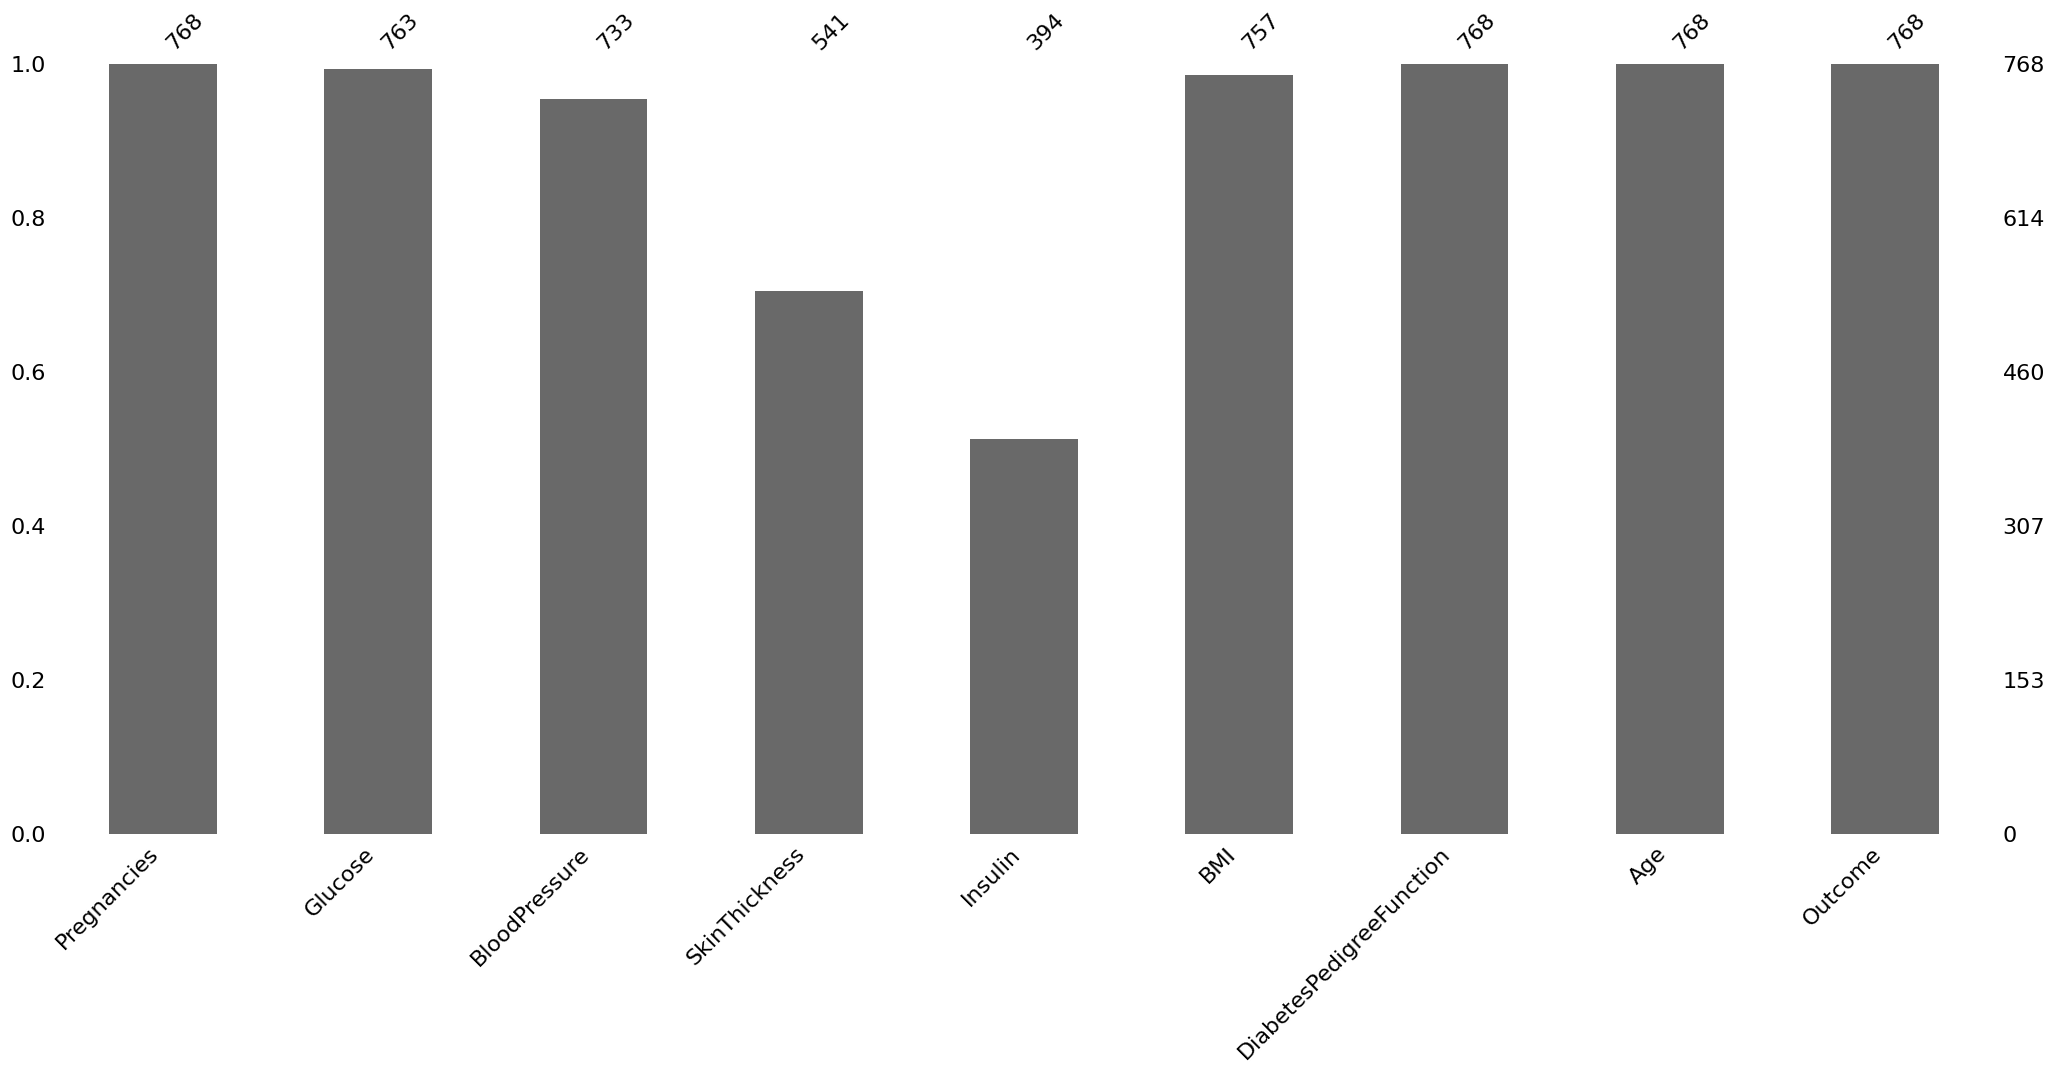

In [9]:
# PLotting
import missingno as msno
msno.bar(df)


<Axes: >

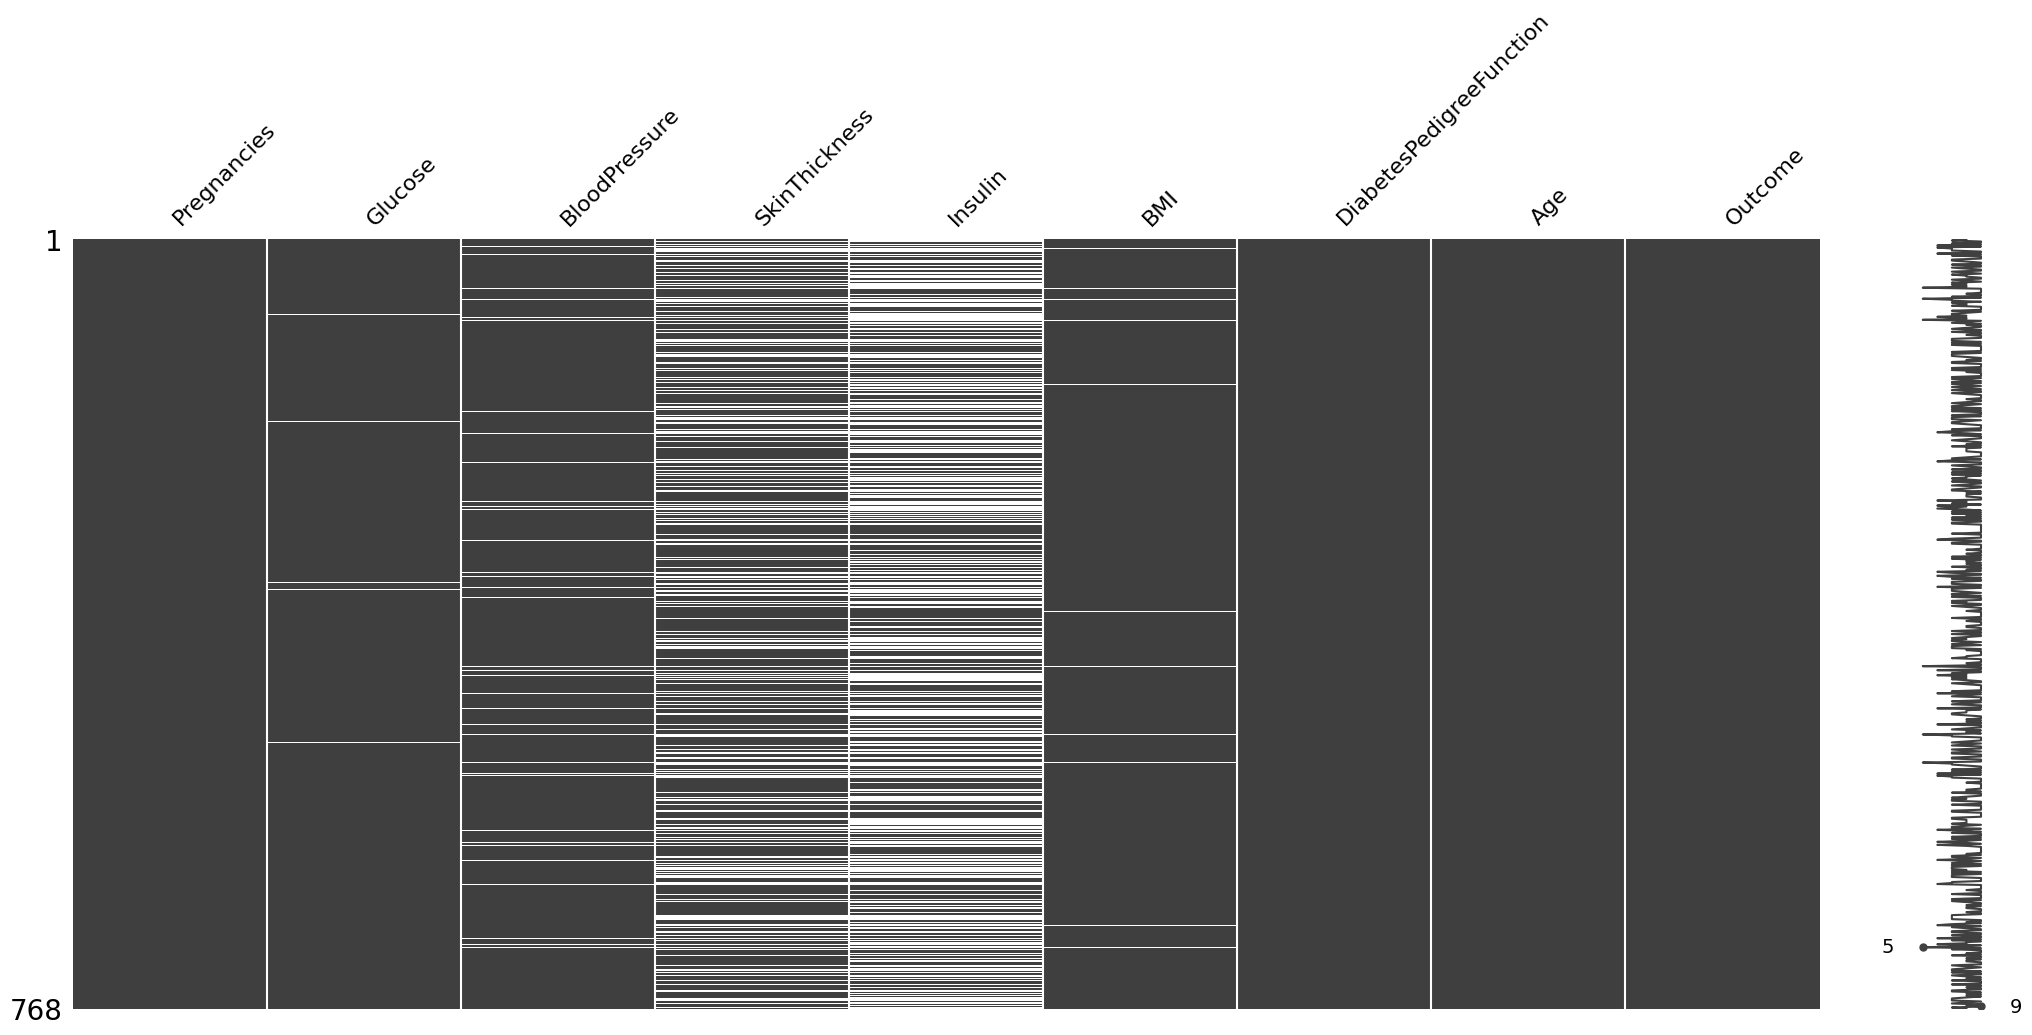

In [10]:
msno.matrix(df)


In [11]:
# THe values to be given for incomplete observations are given the median value of 
# and the median value of peaple who are sick
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:
    median = df[col].median()
    df[col]=df[col].fillna(median)


In [12]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

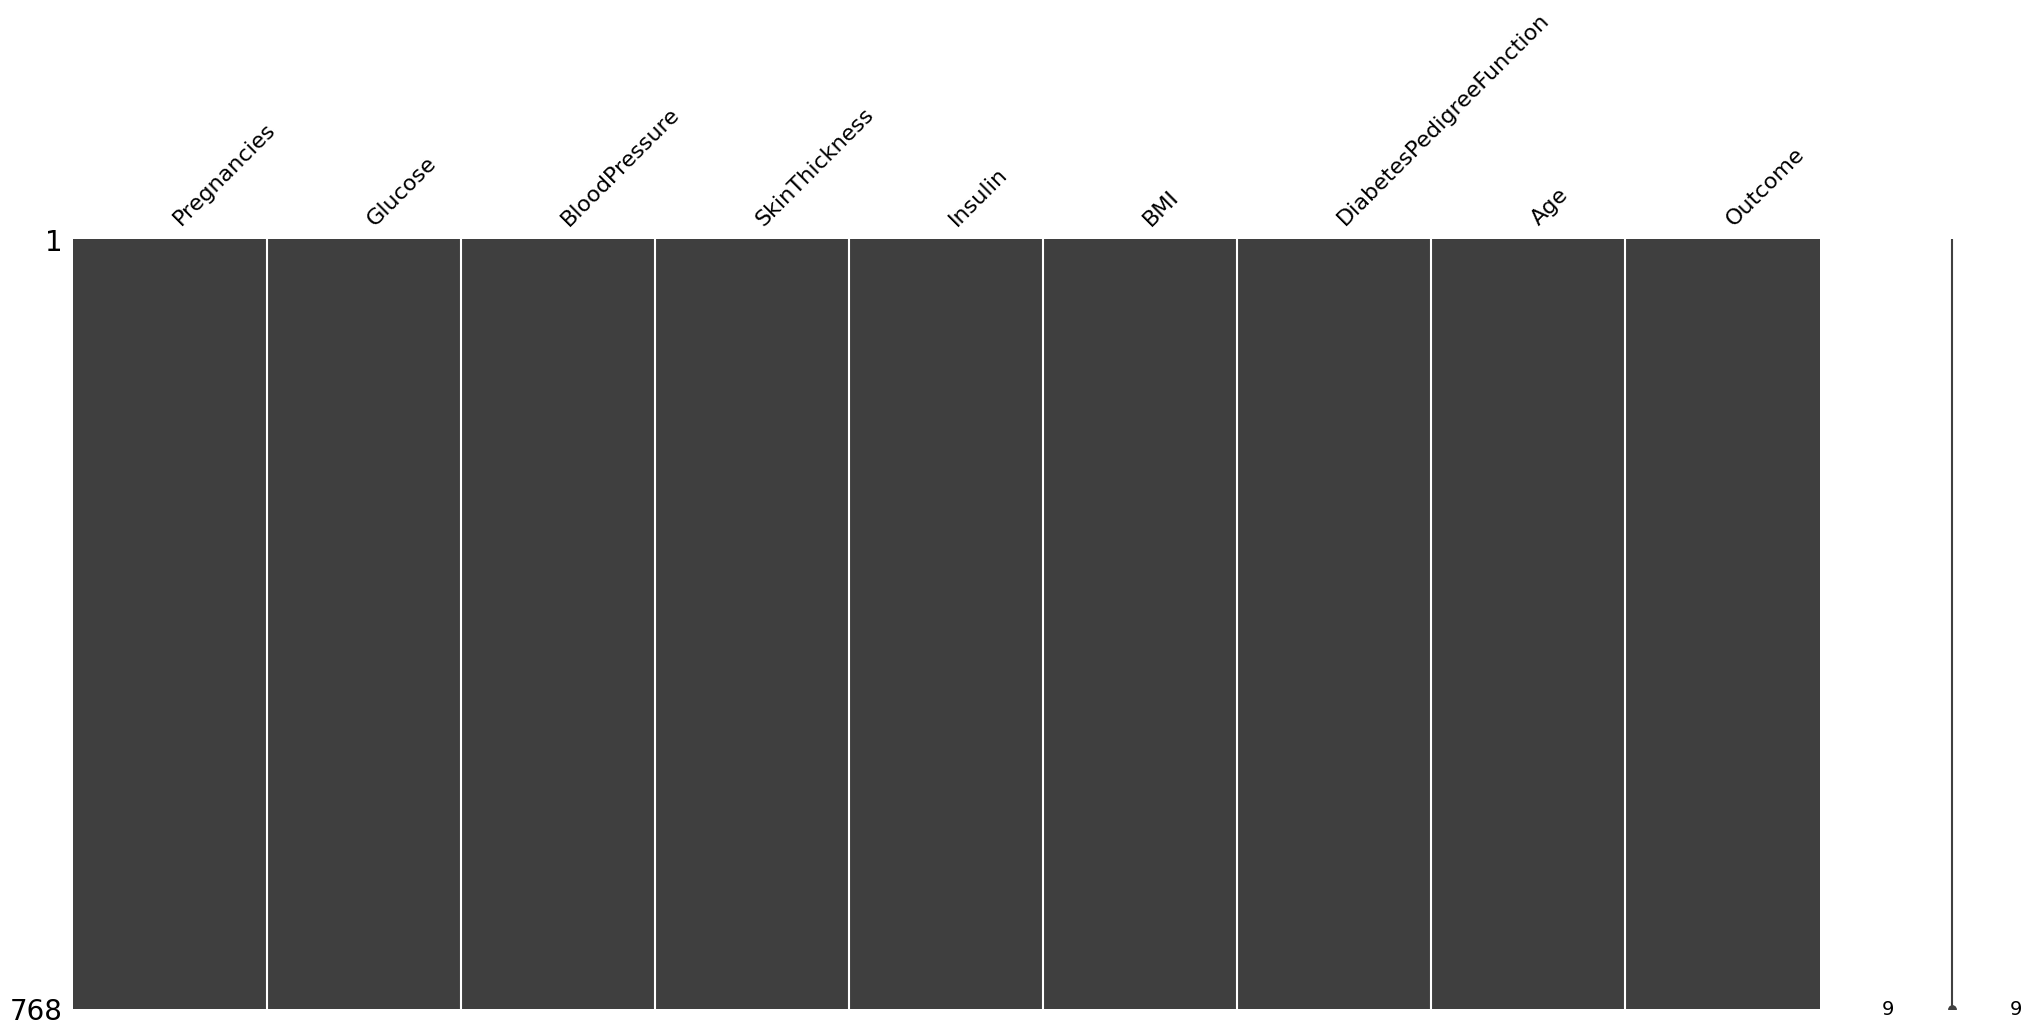

In [14]:
msno.matrix(df)


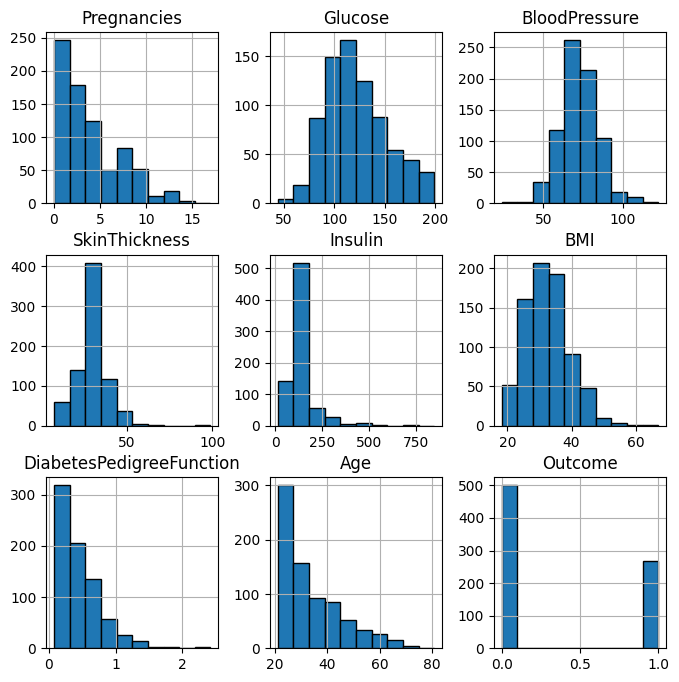

In [15]:
# creating hist
df.hist(figsize=(8,8), edgecolor="black")
plt.show()


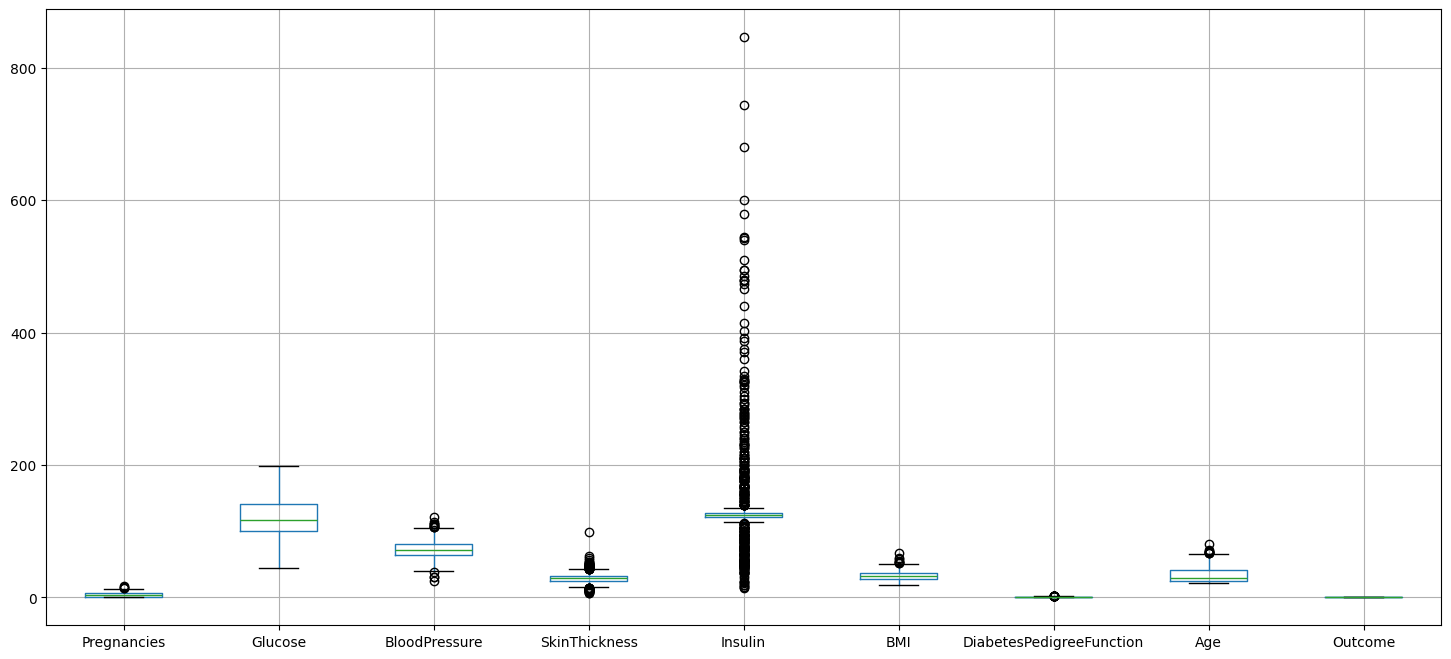

In [16]:
df.boxplot(figsize=(18, 8))
plt.show()


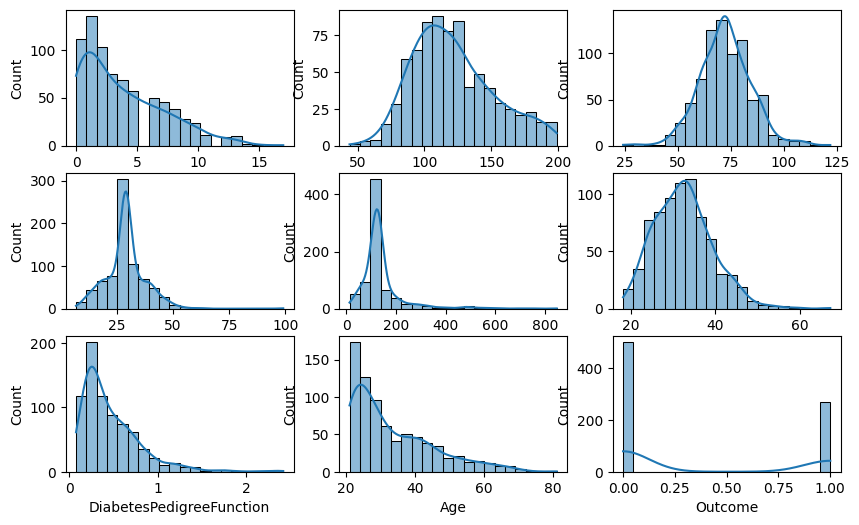

In [17]:
cols = df.columns
fig, ax = plt.subplots(3, 3, figsize=(10, 6))
row_index = 0
col_index = 0
for col in cols:
    sns.histplot(df[col], bins = 20, ax=ax[row_index, col_index], kde=True)
    col_index = col_index + 1
    if (col_index == 3):
        col_index = 0
        row_index = row_index + 1


In [18]:
df["Outcome"].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

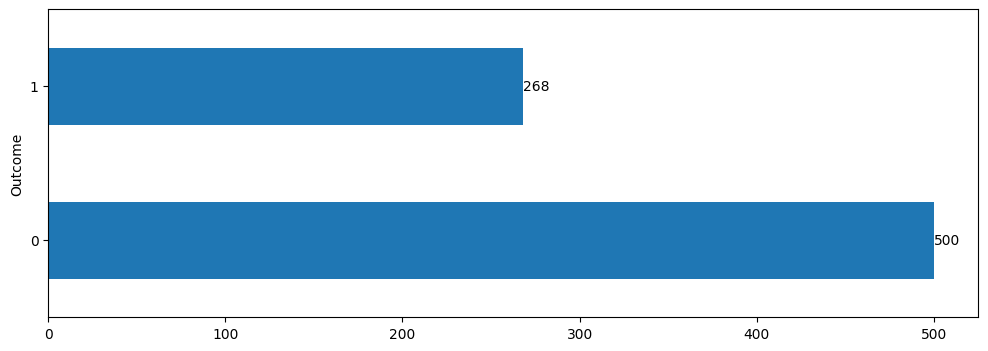

In [19]:
bar = df['Outcome'].value_counts().plot.barh(figsize=(12, 4))
bar = bar.bar_label(bar.containers[0], fontsize=10)


In [20]:
pd.crosstab(df['Age'], df['Outcome'], normalize='index')*100


Outcome,0,1
Age,,
21,92.063492,7.936508
22,84.722222,15.277778
23,81.578947,18.421053
24,82.608696,17.391304
25,70.833333,29.166667
26,75.757576,24.242424
27,75.000000,25.000000
28,71.428571,28.571429
29,55.172414,44.827586


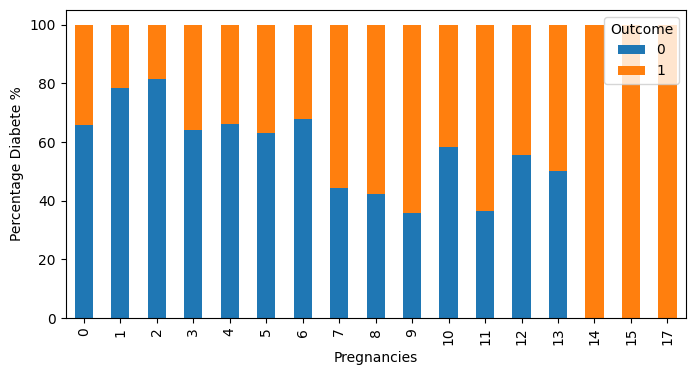

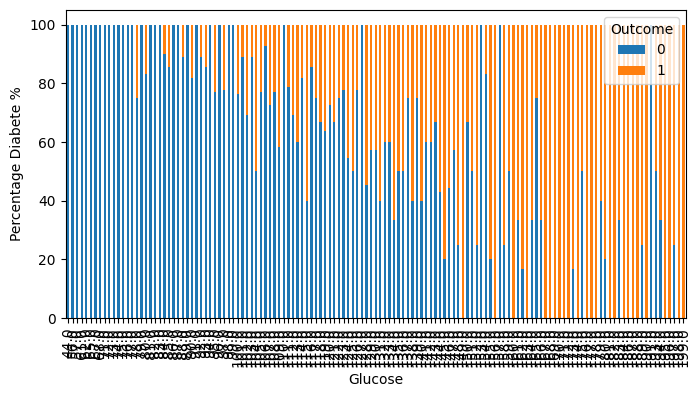

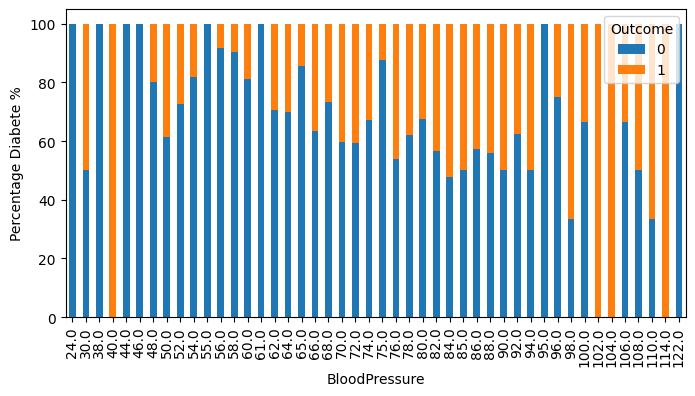

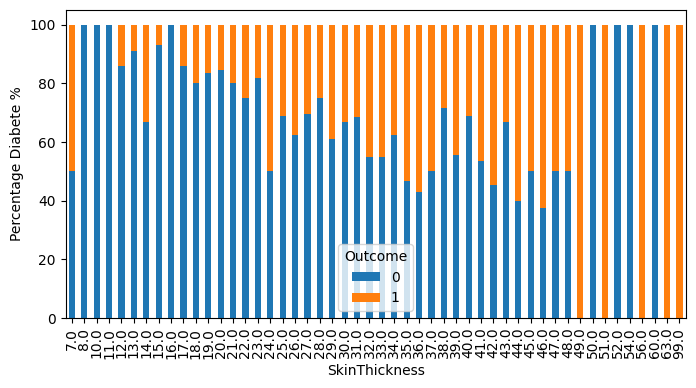

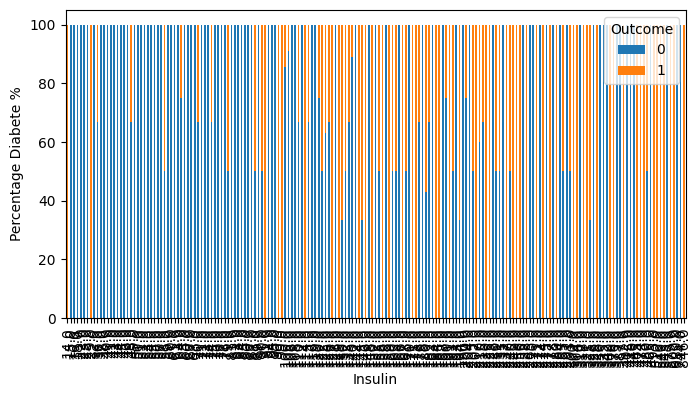

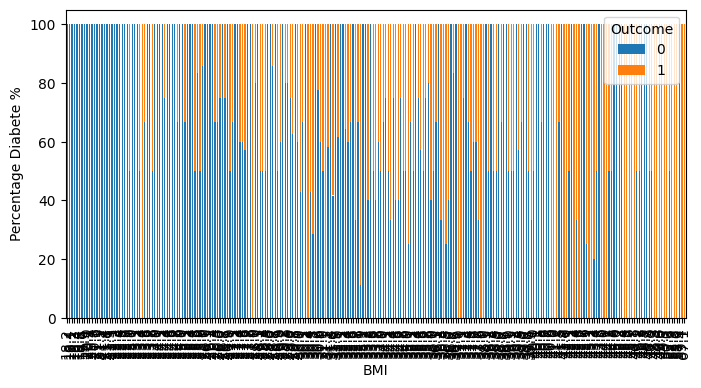

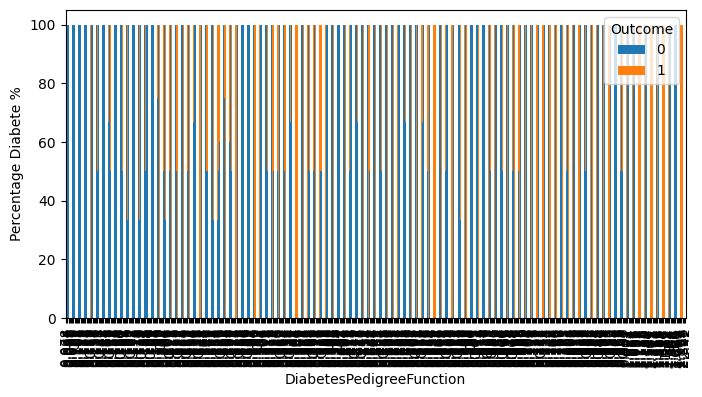

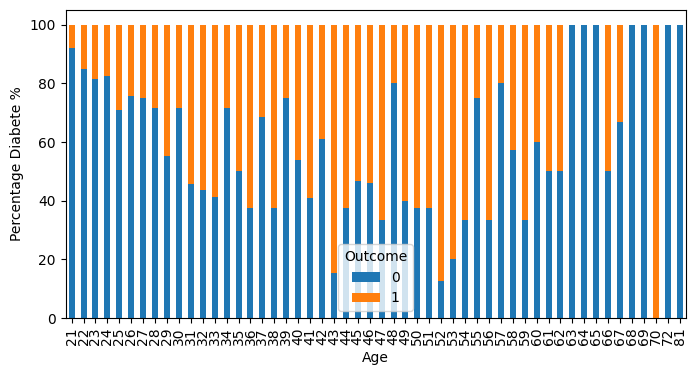

In [21]:
for i in df.columns:
    if i != 'Outcome':
        (pd.crosstab(
            df[i], df['Outcome'], normalize='index'
        )*100).plot(
            kind='bar',
            figsize=(8,4), stacked=True)
        plt.ylabel('Percentage Diabete %')


In [22]:
df.groupby(['Outcome'])[df.columns].mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000,0.0
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164,1.0


<Axes: xlabel='Outcome'>

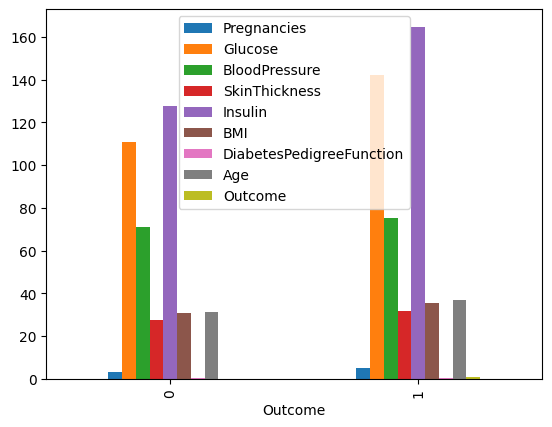

In [23]:
df.groupby(['Outcome'])[df.columns].mean().plot.bar()


In [24]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])


<Axes: >

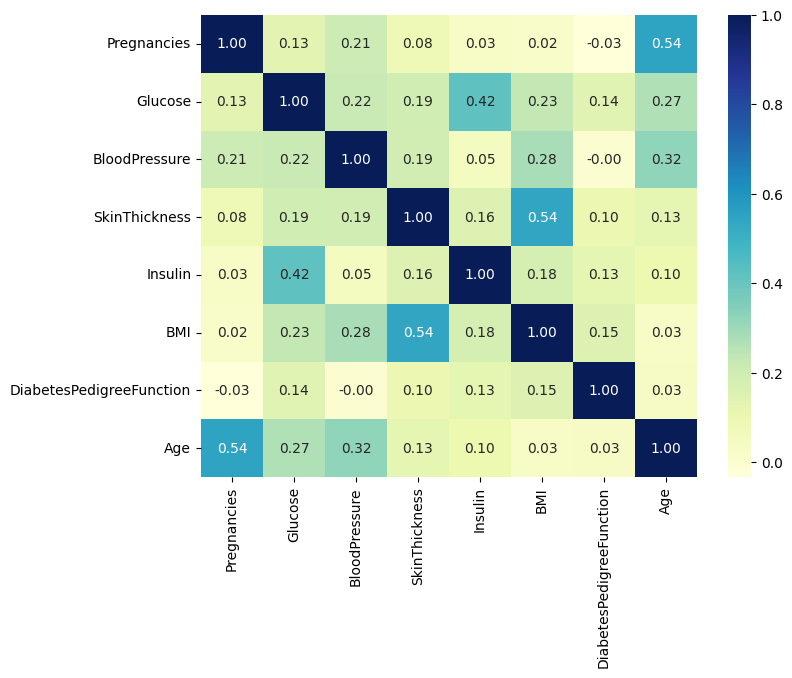

In [25]:
# Plotting the correlation between numerical variable
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, fmt='0.2f', cmap='YlGnBu')


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [27]:
# Scaling the data 
sc=StandardScaler()


In [28]:
# Fit_transform on train data
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [29]:
X_train.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
429,1,95.0,82.0,25.0,180.0,35.0,0.233,43
524,3,125.0,58.0,29.0,125.0,31.6,0.151,24
212,7,179.0,95.0,31.0,125.0,34.2,0.164,60
558,11,103.0,68.0,40.0,125.0,46.2,0.126,42
66,0,109.0,88.0,30.0,125.0,32.5,0.855,38


In [30]:
X_train_scaled.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.847578,-0.854765,0.814151,-0.493730,0.435780,0.377880,-0.695485,0.815489
1,-0.244332,0.131856,-1.206800,-0.015151,-0.195233,-0.126494,-0.943389,-0.789224
2,0.962161,1.907772,1.908833,0.224139,-0.195233,0.259203,-0.904087,2.251285
3,2.168653,-0.591666,-0.364737,1.300943,-0.195233,2.039345,-1.018969,0.731031
4,-1.149201,-0.394342,1.319389,0.104494,-0.195233,0.007017,1.184953,0.393196


In [31]:
model_lgr = LogisticRegression(max_iter=1000)


In [32]:
model_lgr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [33]:
y_pred_train = model_lgr.predict(X_train_scaled)
y_pred_test = model_lgr.predict(X_test_scaled)


In [34]:
print("Accuracy", metrics.accuracy_score(y_train, y_pred_train))
print("Prediction", metrics.precision_score(y_train, y_pred_train))
print("Recall", metrics.recall_score(y_train, y_pred_train))


Accuracy 0.7672253258845437
Prediction 0.7099236641221374
Recall 0.5166666666666667


In [35]:
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       357
           1       0.71      0.52      0.60       180

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537



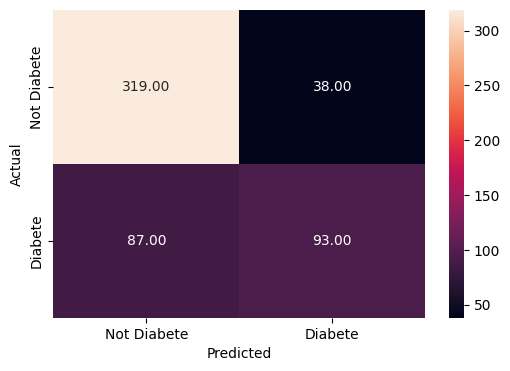

In [36]:
cm = metrics.confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Not Diabete", 'Diabete'], yticklabels=["Not Diabete", 'Diabete'])
plt.ylabel("Actual")
plt.xlabel('Predicted')
plt.show()


In [37]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       143
           1       0.78      0.60      0.68        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



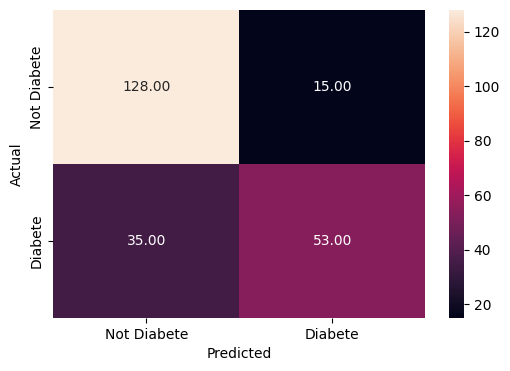

In [38]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Not Diabete", 'Diabete'], yticklabels=["Not Diabete", 'Diabete'])
plt.ylabel("Actual")
plt.xlabel('Predicted')
plt.show()


In [39]:
# Creating metric functionn
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = metrics.confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Diabete', 'Diabete'], yticklabels=['Not Diabete', 'Diabete'])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       357
           1       0.71      0.52      0.60       180

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537



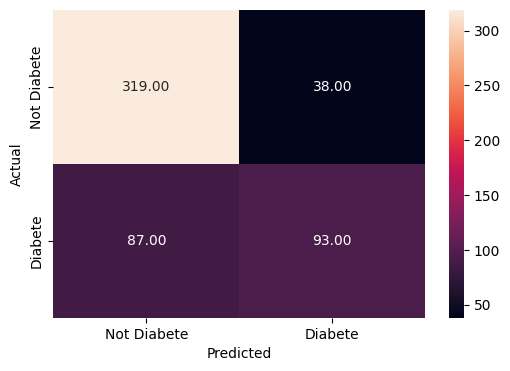

In [40]:
metrics_score(y_train, y_pred_train)


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       143
           1       0.78      0.60      0.68        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



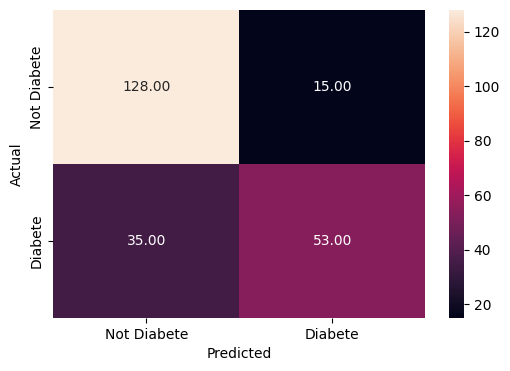

In [41]:
metrics_score(y_test, y_pred_test)


In [42]:
# Printing the coefficients of logistic regression
cols = X.columns
coef_lg = model_lgr.coef_
coefs = pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0, ascending=False)
coefs


,0
Glucose,1.085682
BMI,0.628917
Pregnancies,0.387982
DiabetesPedigreeFunction,0.256931
Age,0.134037
SkinThickness,0.008910
BloodPressure,-0.125143
Insulin,-0.184905


<Axes: >

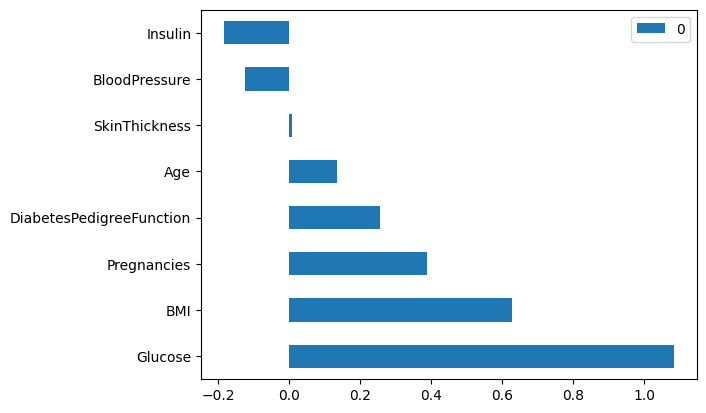

In [43]:
coefs.plot.barh()


In [44]:
import numpy as np
# Finding the odds
odds = np.exp(model_lgr.coef_[0])

# Adding the odds to a dataframe and sorting the values
df_odds = pd.DataFrame(odds, X_train_scaled.columns, columns= ['odds']).sort_values(by='odds', ascending=True)
df_odds


,odds
Insulin,0.831183
BloodPressure,0.882371
SkinThickness,1.008950
Age,1.143435
DiabetesPedigreeFunction,1.292956
Pregnancies,1.474003
BMI,1.875578
Glucose,2.961460


<Axes: >

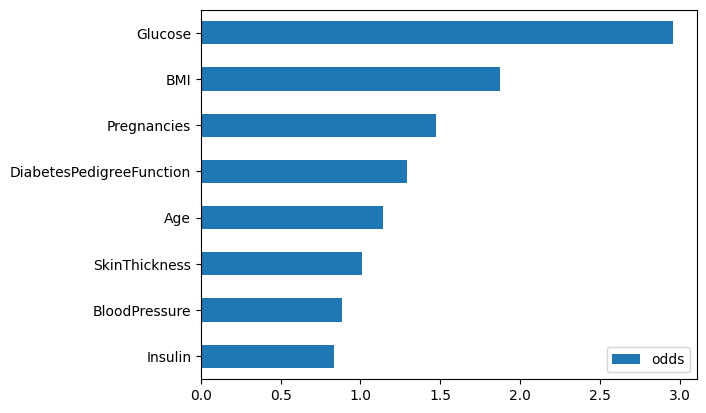

In [45]:
df_odds.plot.barh()


In [46]:
# Precision-Recall curve for logistic regression
y_scores_lg = model_lgr.predict_log_proba(X_train_scaled)
y_scores_lg


array([[-0.10760017, -2.28265081],
       [-0.2893416 , -1.38133223],
       [-1.76449612, -0.18786457],
       ...,
       [-0.12043668, -2.1762452 ],
       [-0.28885076, -1.38279648],
       [-0.20828703, -1.67117472]], shape=(537, 2))

In [47]:
y_scores_lg = model_lgr.predict_proba(X_train_scaled)
precisions_lg, recalls_lg, thresholds_lg = metrics.precision_recall_curve(y_train, y_scores_lg[:, 1])


In [48]:
precisions_lg


array([0.33519553, 0.3358209 , 0.3364486 , 0.33707865, 0.33771107,
       0.33834586, 0.33898305, 0.33962264, 0.34026465, 0.34090909,
       0.34155598, 0.34220532, 0.34285714, 0.34351145, 0.34416826,
       0.34482759, 0.34548944, 0.34615385, 0.34682081, 0.34749035,
       0.34816248, 0.34883721, 0.34951456, 0.35019455, 0.35087719,
       0.3515625 , 0.35225049, 0.35294118, 0.35363458, 0.35433071,
       0.35502959, 0.35573123, 0.35643564, 0.35714286, 0.35785288,
       0.35856574, 0.35928144, 0.36      , 0.36072144, 0.36144578,
       0.36217304, 0.36290323, 0.36363636, 0.36437247, 0.36511156,
       0.36585366, 0.36659878, 0.36734694, 0.36809816, 0.36885246,
       0.36960986, 0.37037037, 0.37113402, 0.37190083, 0.37267081,
       0.37344398, 0.37214137, 0.37291667, 0.3736952 , 0.37447699,
       0.37526205, 0.37605042, 0.37684211, 0.37763713, 0.37843552,
       0.37923729, 0.38004246, 0.38085106, 0.38166311, 0.38247863,
       0.38329764, 0.38412017, 0.38494624, 0.38577586, 0.38660

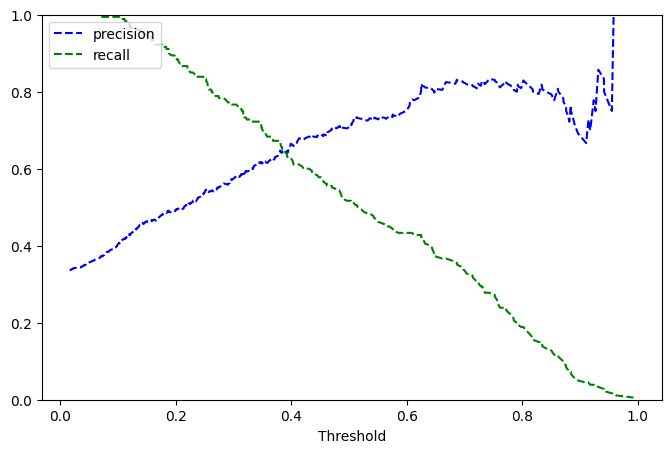

In [49]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg = model_lgr.predict_proba(X_train_scaled)
precisions_lg, recalls_lg, thresholds_lg  = metrics.precision_recall_curve(y_train, y_scores_lg[:,1])
# plot values of precisions, recalls, and thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label="precision")
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       357
           1       0.66      0.62      0.64       180

    accuracy                           0.77       537
   macro avg       0.74      0.73      0.73       537
weighted avg       0.76      0.77      0.77       537



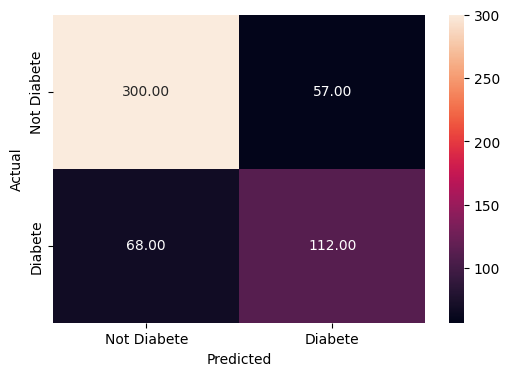

In [50]:
optimal_threshold = .4
y_pred_train = model_lgr.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       143
           1       0.73      0.70      0.72        88

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



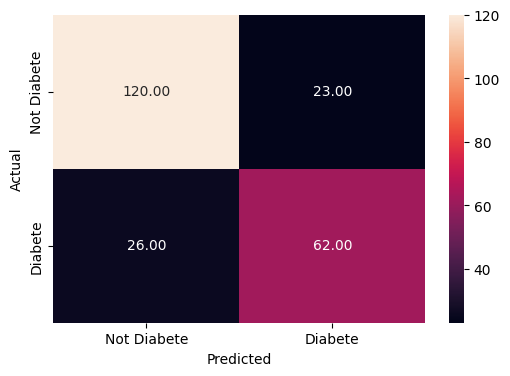

In [51]:
optimal_threshold =.4
y_pred_test = model_lgr.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)


In [52]:
# fitting svm
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [53]:
pred_train = model2.predict(X_train_scaled)
pred_test = model2.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       357
           1       0.70      0.48      0.57       180

    accuracy                           0.76       537
   macro avg       0.74      0.69      0.70       537
weighted avg       0.75      0.76      0.74       537



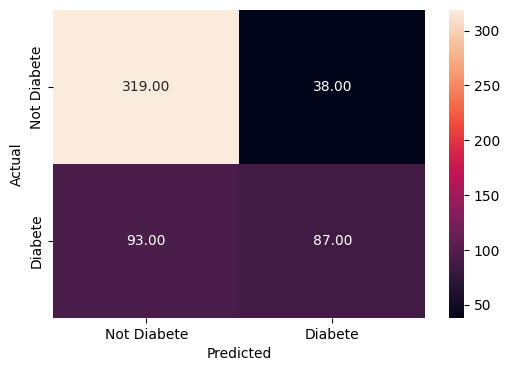

In [54]:
metrics_score(y_train, pred_train)


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       143
           1       0.80      0.62      0.70        88

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



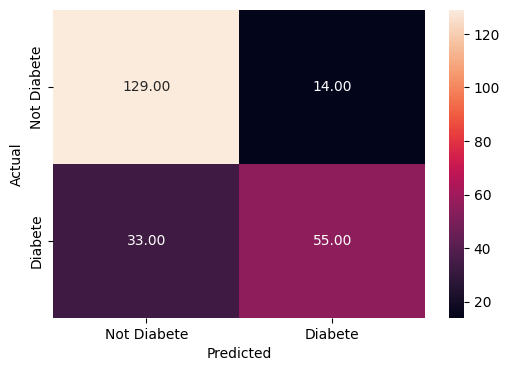

In [55]:
metrics_score(y_test, pred_test)


In [56]:
# Building decision tree model
model3 = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)


In [57]:
model3.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [58]:
pred_train = model3.predict(X_train_scaled)
pred_test = model3.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       180

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



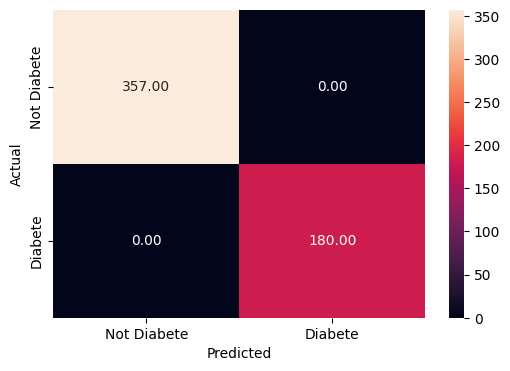

In [59]:
metrics_score(y_train, pred_train)


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       143
           1       0.61      0.64      0.62        88

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



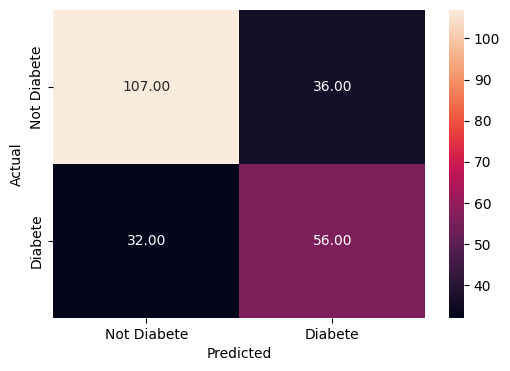

In [60]:
metrics_score(y_test, pred_test)


In [61]:
importance = model3.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importance, index= columns, columns=['Importance']).sort_values(by="Importance", ascending=False)


In [62]:
importance_df


,Importance
Glucose,0.304251
BMI,0.225193
Age,0.126348
DiabetesPedigreeFunction,0.115982
Insulin,0.082953
BloodPressure,0.067026
SkinThickness,0.056912
Pregnancies,0.021335


In [63]:
importance_df = importance_df.reset_index()
importance_df


,index,Importance
0,Glucose,0.304251
1,BMI,0.225193
2,Age,0.126348
3,DiabetesPedigreeFunction,0.115982
4,Insulin,0.082953
5,BloodPressure,0.067026
6,SkinThickness,0.056912
7,Pregnancies,0.021335


<Axes: xlabel='Importance', ylabel='index'>

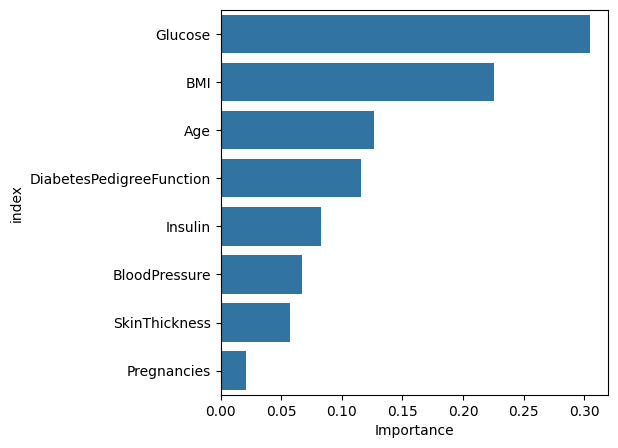

In [64]:
plt.figure(figsize=(5, 5))
sns.barplot(data=importance_df, y='index', x='Importance', orient='h')


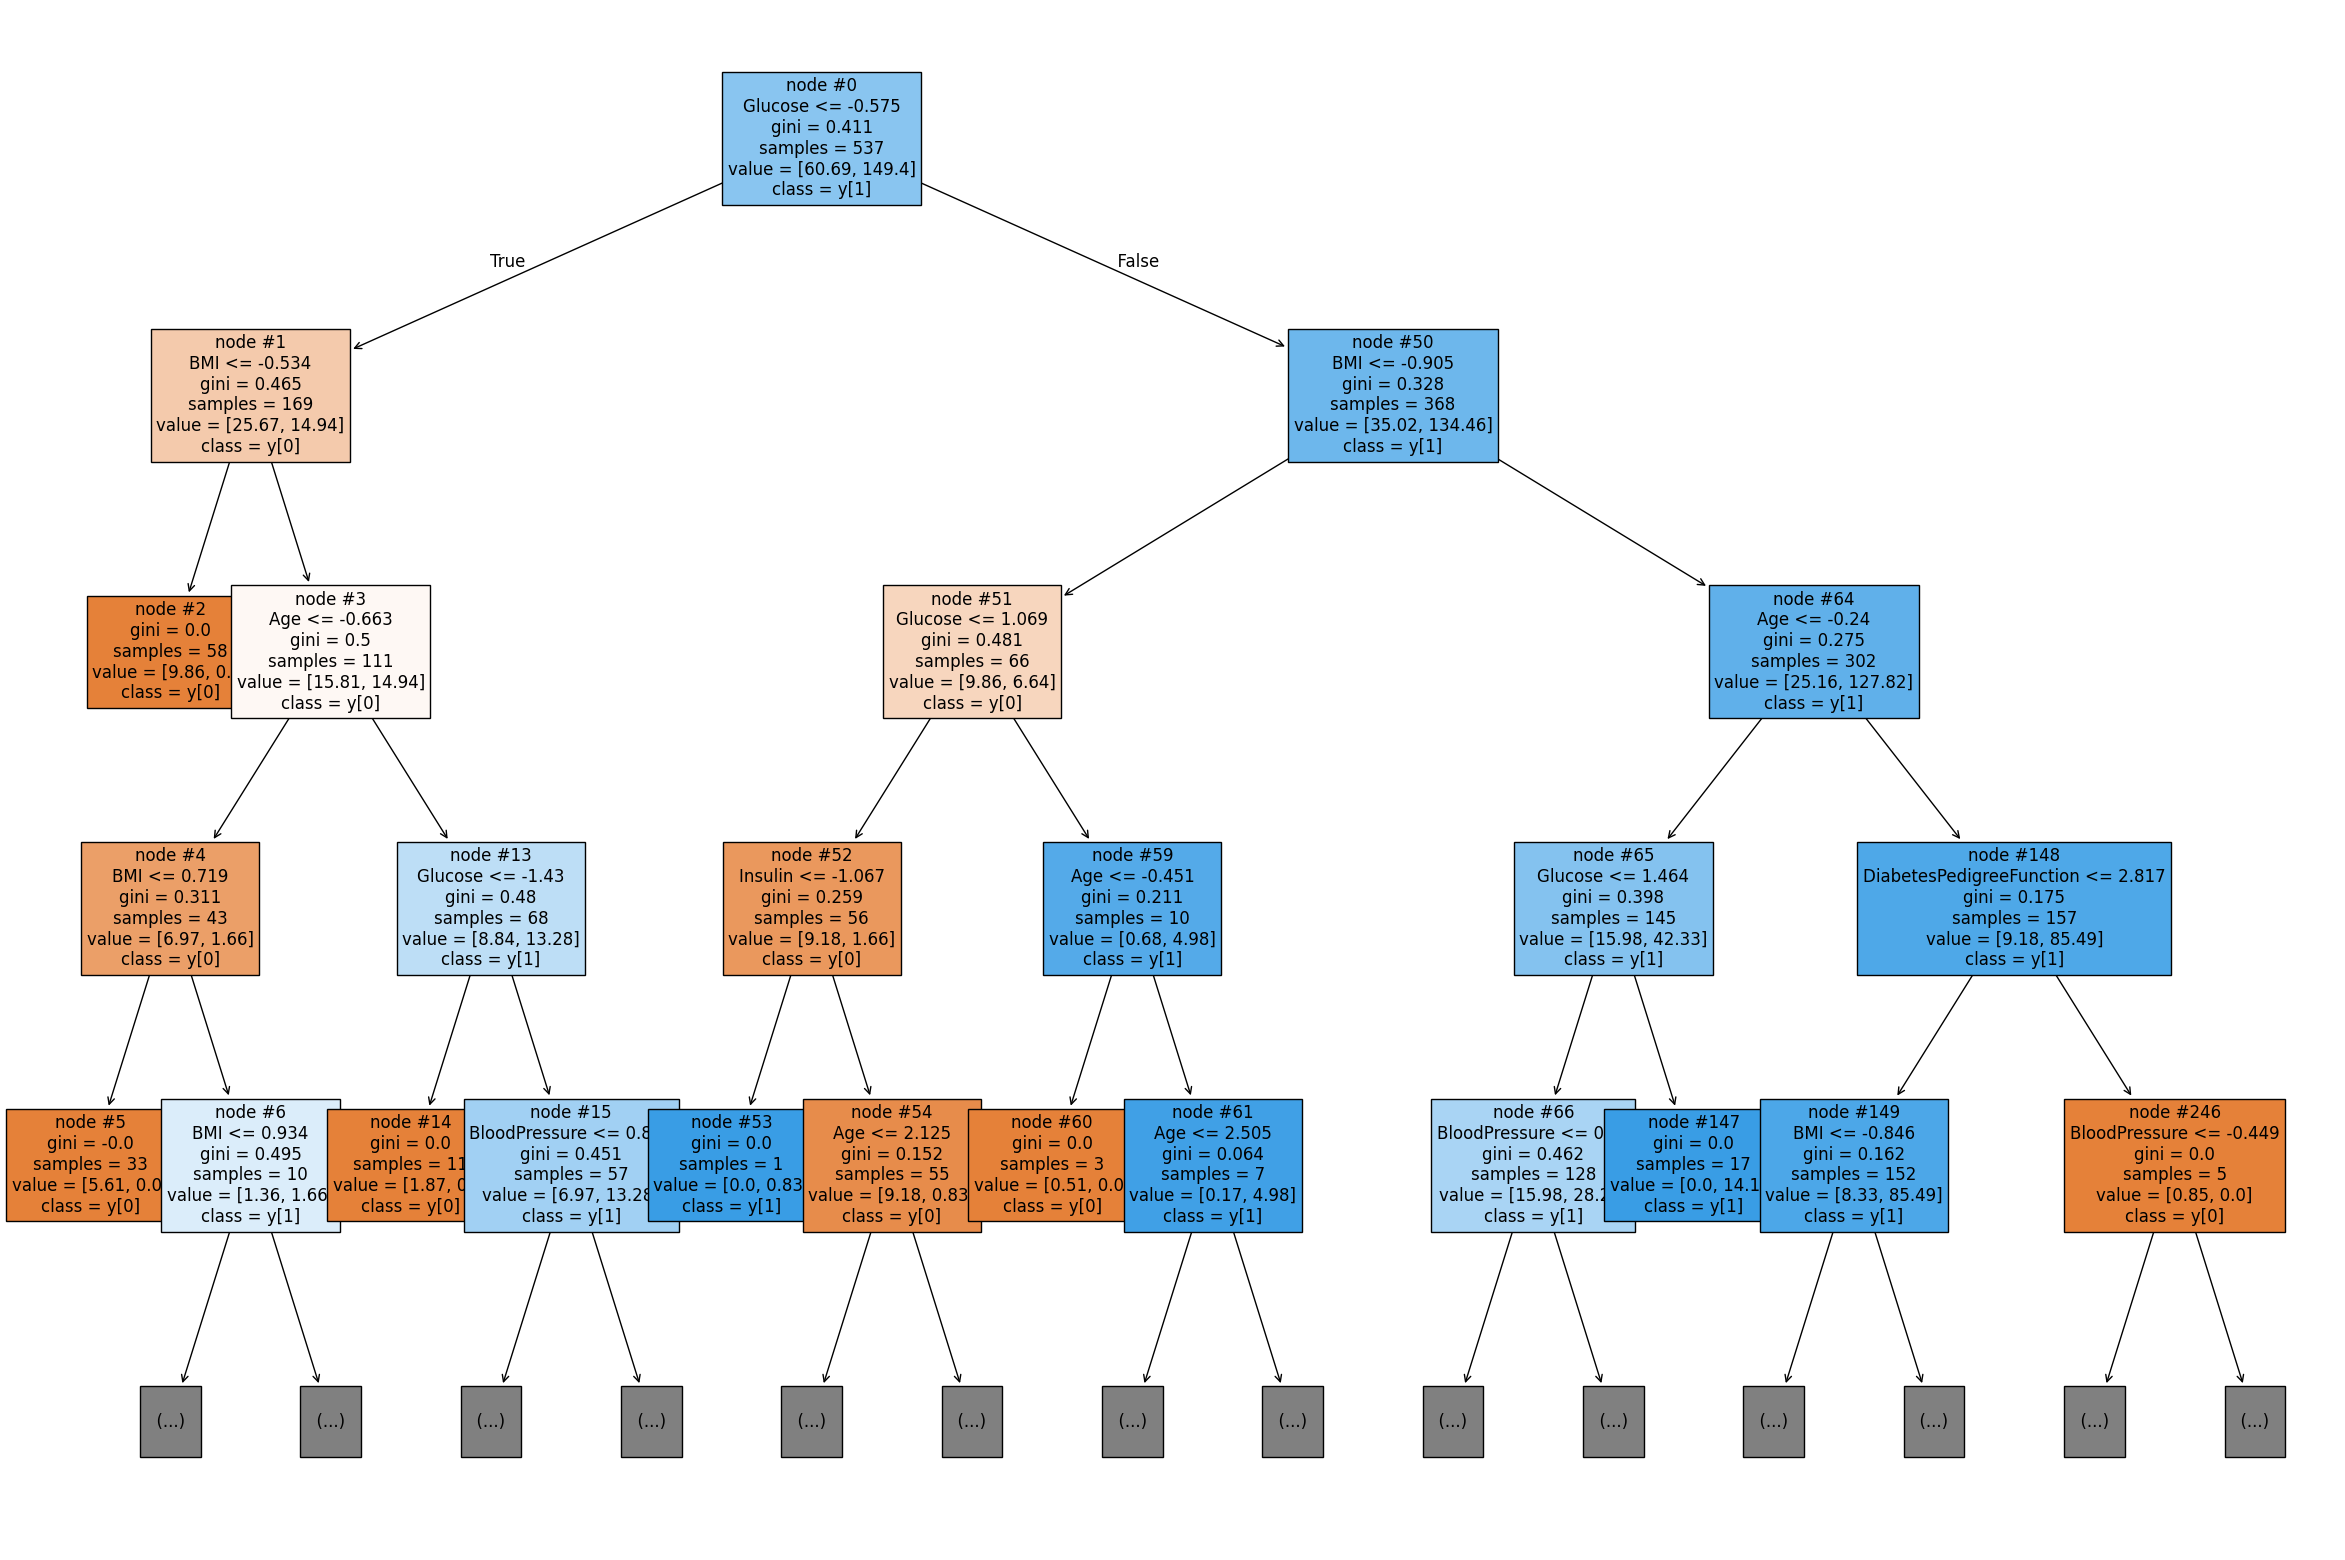

In [65]:
from sklearn import tree
features = list(X.columns)
plt.figure(figsize=(30, 20))
tree.plot_tree(model3, max_depth=4, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True)

plt.show()


### Reseaux Neuraunal

In [66]:
from sklearn.neural_network import MLPClassifier
model4 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                       hidden_layer_sizes=(10,5,3), random_state=1, max_iter=2000)
model4.fit(X=X_train_scaled, y= y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5, 3), max_iter=2000,
              random_state=1, solver='lbfgs')

In [67]:
pred_train = model4.predict(X_train_scaled)
pred_test = model4.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       357
           1       0.93      0.82      0.87       180

    accuracy                           0.92       537
   macro avg       0.92      0.90      0.91       537
weighted avg       0.92      0.92      0.92       537



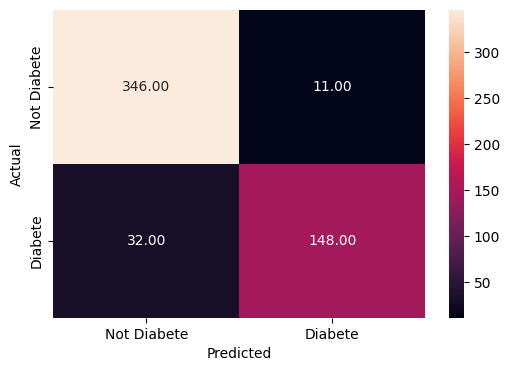

In [68]:
metrics_score(y_train, pred_train)


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       143
           1       0.71      0.62      0.66        88

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.75      0.76      0.75       231



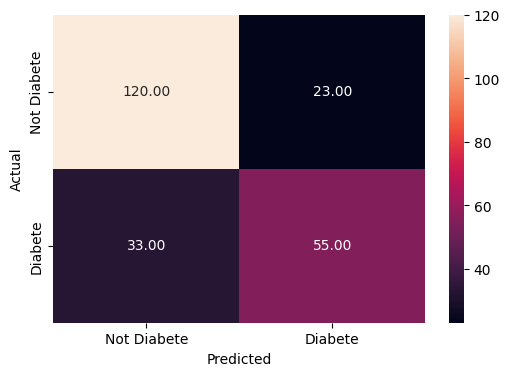

In [69]:
metrics_score(y_test, pred_test)


### K-Neighbor 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X=X_train_scaled, y= y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_train = Knn.predict(X_train_scaled)
pred_test = Knn.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       357
           1       0.80      0.75      0.77       180

    accuracy                           0.85       537
   macro avg       0.84      0.83      0.83       537
weighted avg       0.85      0.85      0.85       537



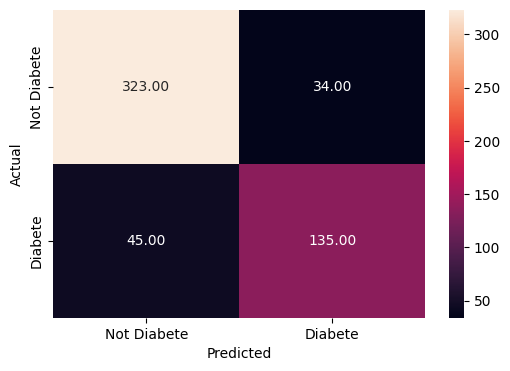

In [ ]:
metrics_score(y_train, pred_train)


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       143
           1       0.70      0.66      0.68        88

    accuracy                           0.76       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



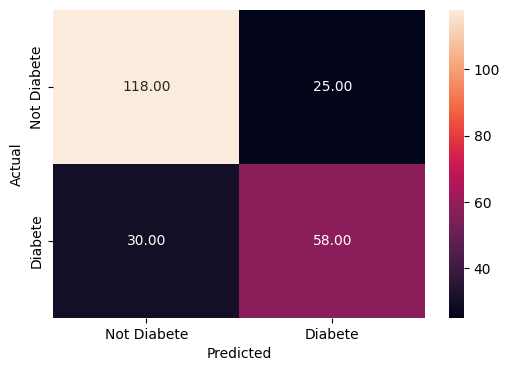

In [ ]:
metrics_score(y_test, pred_test)


### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [ ]:
Rf = RandomForestClassifier(random_state= 1)

Rf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
pred_train = Rf.predict(X_train)
pred_test = Rf.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       180

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



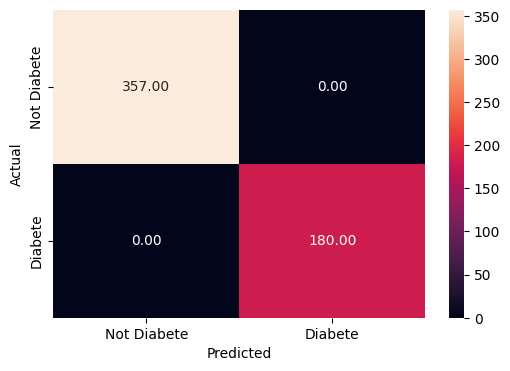

In [ ]:
metrics_score(y_train, pred_train)


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       143
           1       0.70      0.67      0.69        88

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.76      0.77      0.77       231



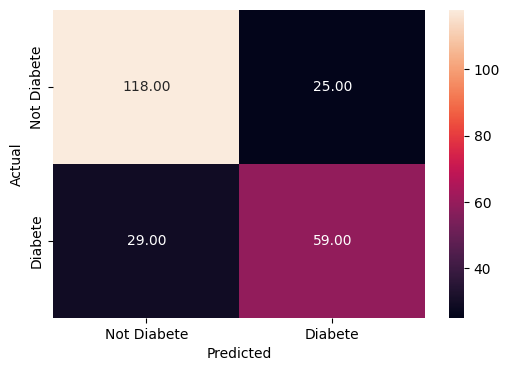

In [ ]:
metrics_score(y_test, pred_test)


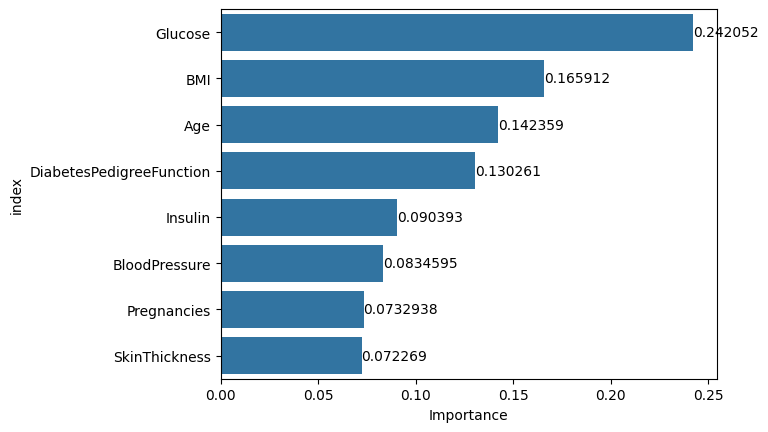

In [ ]:
importances = Rf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(
    importances, index=columns,
    columns= ['Importance']
).sort_values(by= 'Importance', ascending= False)
importance_df = importance_df.reset_index()
bar = sns.barplot(data=importance_df, x='Importance', y='index', orient='h')
bar = bar.bar_label(bar.containers[0], fontsize=10)
